In [1]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

covid_path = "Resources/COVID_19.csv"
GDP_path = "Resources/Global_GDP.csv"
cities_path = "Resources/worldcities.csv"

COVID_data = pd.read_csv(covid_path)
GDP_data = pd.read_csv(GDP_path)
cities_data = pd.read_csv(cities_path)
COVID_data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,08/10/2020,8,10,2020,68,1,Afghanistan,AF,AFG,38041757.0,Asia,1.172396
1,07/10/2020,7,10,2020,62,2,Afghanistan,AF,AFG,38041757.0,Asia,1.059362
2,06/10/2020,6,10,2020,145,5,Afghanistan,AF,AFG,38041757.0,Asia,1.083020
3,05/10/2020,5,10,2020,44,0,Afghanistan,AF,AFG,38041757.0,Asia,0.780721
4,04/10/2020,4,10,2020,7,4,Afghanistan,AF,AFG,38041757.0,Asia,0.665059
...,...,...,...,...,...,...,...,...,...,...,...,...
47684,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
47685,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
47686,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
47687,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [2]:
COVID_data = COVID_data.rename(columns={'countriesAndTerritories': 'Countries'})
COVID_country = COVID_data.groupby('Countries')
COVID_sum = COVID_country.sum()
COVID_sum = COVID_sum[['cases','deaths']]
COVID_sum

,cases,deaths
Countries,,
Afghanistan,39616,1470
Albania,14730,407
Algeria,52520,1779
Andorra,2568,53
Angola,5725,211
...,...,...
Vietnam,1099,35
Western_Sahara,766,1
Yemen,2053,594


In [3]:
COVID_per = COVID_data.loc[(COVID_data['dateRep'] == '08/10/2020')]
COVID_per = COVID_per[['Countries','popData2019','countryterritoryCode']]
COVID_per = COVID_per.rename(columns={'popData2019':'Population 2019'})
COVID_per

,Countries,Population 2019,countryterritoryCode
0,Afghanistan,38041757.0,AFG
273,Albania,2862427.0,ALB
487,Algeria,43053054.0,DZA
765,Andorra,76177.0,AND
974,Angola,31825299.0,AGO
...,...,...,...
46656,Vietnam,96462108.0,VNM
46935,Western_Sahara,582458.0,ESH
47101,Yemen,29161922.0,YEM
47283,Zambia,17861034.0,ZMB


In [4]:
COVID_final = pd.merge(COVID_sum, COVID_per, how='inner',on='Countries')
COVID_final['Cases per 100,000 People'] = round(COVID_final['cases']/COVID_final['Population 2019'] * 100000,2)
COVID_final['Deaths per 100,000 People'] = round(COVID_final['deaths']/COVID_final['Population 2019'] * 100000,2)
COVID_final = COVID_final.rename(columns={'cases':'Cases','deaths':'Deaths','countryterritoryCode':'Country Code'})
COVID_final['Deaths per 1000 Cases'] = round(COVID_final['Deaths'] / COVID_final['Cases'] * 1000,2)
COVID_final

,Countries,Cases,Deaths,Population 2019,Country Code,"Cases per 100,000 People","Deaths per 100,000 People",Deaths per 1000 Cases
0,Afghanistan,39616,1470,38041757.0,AFG,104.14,3.86,37.11
1,Albania,14730,407,2862427.0,ALB,514.60,14.22,27.63
2,Algeria,52520,1779,43053054.0,DZA,121.99,4.13,33.87
3,Andorra,2568,53,76177.0,AND,3371.10,69.57,20.64
4,Angola,5725,211,31825299.0,AGO,17.99,0.66,36.86
...,...,...,...,...,...,...,...,...
203,Vietnam,1099,35,96462108.0,VNM,1.14,0.04,31.85
204,Western_Sahara,766,1,582458.0,ESH,131.51,0.17,1.31
205,Yemen,2053,594,29161922.0,YEM,7.04,2.04,289.33
206,Zambia,15224,334,17861034.0,ZMB,85.24,1.87,21.94


In [5]:
GDP_data = GDP_data[['Country Name','Country Code','2017','2018','2019']]
GDP_data['2017 GDP in Billions'] = GDP_data['2017'] / 1000000000
GDP_data['2018 GDP in Billions'] = GDP_data['2018'] / 1000000000
GDP_data['2019 GDP in Billions'] = GDP_data['2019'] / 1000000000
GDP_data

,Country Name,Country Code,2017,2018,2019,2017 GDP in Billions,2018 GDP in Billions,2019 GDP in Billions
0,Aruba,ABW,3.056425e+09,NaN,NaN,3.056425,NaN,NaN
1,Afghanistan,AFG,2.019176e+10,1.948438e+10,1.910135e+10,20.191760,19.484385,19.101354
2,Angola,AGO,1.221240e+11,1.013530e+11,9.463542e+10,122.124000,101.353000,94.635416
3,Albania,ALB,1.301969e+10,1.514702e+10,1.527808e+10,13.019693,15.147021,15.278077
4,Andorra,AND,3.000181e+09,3.218316e+09,3.154058e+09,3.000181,3.218316,3.154058
...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,7.245707e+09,7.942962e+09,7.926108e+09,7.245707,7.942962,7.926108
260,"Yemen, Rep.",YEM,2.456133e+10,2.759126e+10,NaN,24.561328,27.591262,NaN
261,South Africa,ZAF,3.495540e+11,3.682890e+11,3.514320e+11,349.554000,368.289000,351.432000
262,Zambia,ZMB,2.586814e+10,2.700524e+10,2.306472e+10,25.868142,27.005239,23.064722


In [6]:
GDP_clean = GDP_data[['Country Name','Country Code','2017 GDP in Billions','2018 GDP in Billions','2019 GDP in Billions']]
GDP_clean = GDP_clean.rename(columns={'Country Name':'Countries'})
GDP_clean

,Countries,Country Code,2017 GDP in Billions,2018 GDP in Billions,2019 GDP in Billions
0,Aruba,ABW,3.056425,NaN,NaN
1,Afghanistan,AFG,20.191760,19.484385,19.101354
2,Angola,AGO,122.124000,101.353000,94.635416
3,Albania,ALB,13.019693,15.147021,15.278077
4,Andorra,AND,3.000181,3.218316,3.154058
...,...,...,...,...,...
259,Kosovo,XKX,7.245707,7.942962,7.926108
260,"Yemen, Rep.",YEM,24.561328,27.591262,NaN
261,South Africa,ZAF,349.554000,368.289000,351.432000
262,Zambia,ZMB,25.868142,27.005239,23.064722


In [7]:
GDP_clean = GDP_clean.fillna(0)
GDP_clean

,Countries,Country Code,2017 GDP in Billions,2018 GDP in Billions,2019 GDP in Billions
0,Aruba,ABW,3.056425,0.000000,0.000000
1,Afghanistan,AFG,20.191760,19.484385,19.101354
2,Angola,AGO,122.124000,101.353000,94.635416
3,Albania,ALB,13.019693,15.147021,15.278077
4,Andorra,AND,3.000181,3.218316,3.154058
...,...,...,...,...,...
259,Kosovo,XKX,7.245707,7.942962,7.926108
260,"Yemen, Rep.",YEM,24.561328,27.591262,0.000000
261,South Africa,ZAF,349.554000,368.289000,351.432000
262,Zambia,ZMB,25.868142,27.005239,23.064722


In [8]:
cities_data.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


In [9]:
cities_data = cities_data.loc[(cities_data['capital'] == 'primary')]
cities_data = cities_data.rename(columns={'city':'Capital','lat':'Latitude','iso3':'Country Code'})
cities_clean = cities_data[['Capital','Latitude','Country Code']]
cities_clean = cities_clean.drop_duplicates(subset=['Country Code'],keep='first')
cities_clean

,Capital,Latitude,Country Code
0,Tokyo,35.6850,JPN
2,Mexico City,19.4424,MEX
9,Dhaka,23.7231,BGD
10,Buenos Aires,-34.6025,ARG
12,Cairo,30.0500,EGY
...,...,...,...
599,Hagåtña,13.4745,GUM
600,Al Quds,31.7764,XWB
601,Philipsburg,18.0255,SXM
603,Pristina,42.6666,XKS


In [10]:
COVID_GDP = pd.merge(COVID_final,GDP_clean,how='left',on='Country Code')
Final_data = pd.merge(COVID_GDP,cities_clean,how='left',on='Country Code')
del Final_data['Countries_x']
Final_data = Final_data.rename(columns={'Countries_y':'Country'})
Final_data = Final_data[['Country','Country Code','Cases','Deaths','Deaths per 1000 Cases','Population 2019','Cases per 100,000 People','Deaths per 100,000 People','2017 GDP in Billions','2018 GDP in Billions','2019 GDP in Billions','Capital','Latitude']]
Final_data = Final_data[Final_data.Country.notnull()].reset_index(drop=True)
Final_data = Final_data.fillna('Not Available')
Final_data.sort_values('2019 GDP in Billions', ascending = False)

,Country,Country Code,Cases,Deaths,Deaths per 1000 Cases,Population 2019,"Cases per 100,000 People","Deaths per 100,000 People",2017 GDP in Billions,2018 GDP in Billions,2019 GDP in Billions,Capital,Latitude
191,United States,USA,7549794,211801,28.05,3.290649e+08,2294.32,64.36,19485.400000,20529.000000,21374.40,Washington,38.9047
39,China,CHN,90689,4739,52.26,1.433784e+09,6.33,0.33,12310.400000,13894.800000,14342.90,Beijing,39.9289
95,Japan,JPN,87020,1613,18.54,1.268603e+08,68.60,1.27,4866.860000,4954.810000,5081.77,Tokyo,35.685
71,Germany,DEU,310144,9578,30.88,8.301921e+07,373.58,11.54,3665.800000,3949.550000,3845.63,Berlin,52.5218
86,India,IND,6835655,105526,15.44,1.366418e+09,500.26,7.72,2652.750000,2713.170000,2875.14,New Delhi,28.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Faroe Islands,FRO,476,0,0.00,4.867700e+04,977.87,0.00,2.833301,0.000000,0.00,Not Available,Not Available
47,Curacao,CUW,476,1,2.10,1.634230e+05,291.27,0.61,3.116610,3.127908,0.00,Willemstad,12.2004
59,Eritrea,ERI,398,0,0.00,3.497117e+06,11.38,0.00,0.000000,0.000000,0.00,Asmara,15.3333
156,San Marino,SMR,751,42,55.93,3.445300e+04,2179.78,121.91,1.528468,1.637931,0.00,San Marino,43.9172


In [11]:
Final_data.to_csv('Resources/COVID_final_data.csv',index=True)

In [12]:
Final_data_two = Final_data.loc[Final_data['2019 GDP in Billions'] > 0]
Final_data_two.sort_values('2019 GDP in Billions')

,Country,Country Code,Cases,Deaths,Deaths per 1000 Cases,Population 2019,"Cases per 100,000 People","Deaths per 100,000 People",2017 GDP in Billions,2018 GDP in Billions,2019 GDP in Billions,Capital,Latitude
157,Sao Tome and Principe,STP,914,15,16.41,2.150480e+05,425.02,6.98,0.375041,0.422296,0.429017,São Tomé,0.3334
53,Dominica,DMA,31,0,0.00,7.180800e+04,43.17,0.00,0.519837,0.550893,0.596033,Roseau,15.301
155,St. Vincent and the Grenadines,VCT,64,0,0.00,1.105930e+05,57.87,0.00,0.792178,0.811300,0.825385,Kingstown,13.1483
153,St. Kitts and Nevis,KNA,19,0,0.00,5.283400e+04,35.96,0.00,0.996937,1.010815,1.050993,Basseterre,17.302
41,Comoros,COM,491,7,14.26,8.508910e+05,57.70,0.82,1.077440,1.178531,1.185729,Moroni,-11.7042
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,India,IND,6835655,105526,15.44,1.366418e+09,500.26,7.72,2652.750000,2713.170000,2875.140000,New Delhi,28.6
71,Germany,DEU,310144,9578,30.88,8.301921e+07,373.58,11.54,3665.800000,3949.550000,3845.630000,Berlin,52.5218
95,Japan,JPN,87020,1613,18.54,1.268603e+08,68.60,1.27,4866.860000,4954.810000,5081.770000,Tokyo,35.685
39,China,CHN,90689,4739,52.26,1.433784e+09,6.33,0.33,12310.400000,13894.800000,14342.900000,Beijing,39.9289


In [27]:
bins = [0, 4, 10, 15, 20, 25, 40, 60, 100, 250, 400, 1000, 2000, 6000, 21000, 35000]
labels = ['0 - 3.9', '4 - 9.9', '10 - 14.9', '15 - 19.9', '20 - 24.9',
          '25 - 39.9', '40 - 59.9', '60 - 99.9', '100 - 249.9', '250 - 399.9',
          '400 - 999.9', '1000 - 1999.9', '2000 - 5999.9', '6000 - 14999.99', 'GDP 15K +']

Final_data_two['2019 GDP'] = pd.cut(Final_data_two['2019 GDP in Billions'], bins, labels=labels, include_lowest=True)
Final_GDPdata = Final_data_two.groupby('2019 GDP')
Final_GDP = Final_GDPdata.sum()
Final_GDP

C:\Users\anaro\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Cases,Deaths,Deaths per 1000 Cases,Population 2019,"Cases per 100,000 People","Deaths per 100,000 People",2017 GDP in Billions,2018 GDP in Billions,2019 GDP in Billions
2019 GDP,,,,,,,,,
0 - 3.9,40426,762,315.85,4.107555e+07,8021.60,139.33,41.576287,43.766685,44.666320
4 - 9.9,130654,2838,338.03,6.429629e+07,7085.29,121.30,76.323119,82.765320,84.371157
10 - 14.9,214866,4379,413.76,1.644581e+08,7456.72,159.79,221.832780,244.611884,245.538371
15 - 19.9,102400,3162,228.41,1.422876e+08,1709.60,30.02,188.373465,180.874413,173.911244
20 - 24.9,77889,1909,148.65,6.350784e+07,2574.82,44.50,179.329954,192.656537,185.953912
25 - 39.9,387684,6148,169.90,1.550662e+08,7509.10,82.97,332.606029,358.222298,364.017723
40 - 59.9,426559,11904,227.27,2.060851e+08,4458.81,118.71,558.837491,609.833433,617.579597
60 - 99.9,847685,15211,321.70,4.240025e+08,11628.76,192.50,1127.642004,1183.327047,1210.239138
100 - 249.9,2479281,71091,353.21,2.928936e+08,17571.54,315.18,2541.225956,2764.767000,2781.596000


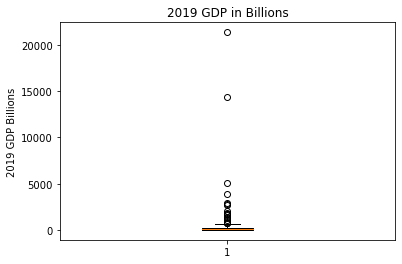

In [14]:
# Example outlier plot of reaction times
GDP_in_Billions = Final_data_two['2019 GDP in Billions']
fig1, ax1 = plt.subplots()
ax1.set_title('2019 GDP in Billions')
ax1.set_ylabel('2019 GDP Billions')
ax1.boxplot(GDP_in_Billions)
plt.show()

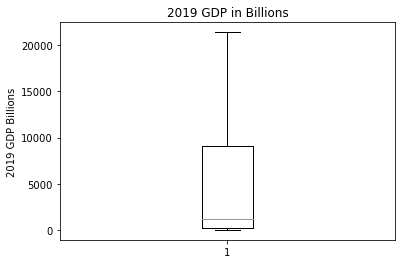

In [15]:
# Example outlier plot of reaction times
GDP_in_Billions = Final_GDP['2019 GDP in Billions']
fig1, ax1 = plt.subplots()
ax1.set_title('2019 GDP in Billions')
ax1.set_ylabel('2019 GDP Billions')
ax1.boxplot(GDP_in_Billions)
plt.show()

In [16]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = Final_data_two['2019 GDP in Billions'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {round(lowerq,2)}")
print(f"The upper quartile of temperatures is: {round(upperq,2)}")
print(f"The interquartile range of temperatures is: {round(iqr,4)}")
print(f"The the median of temperatures is: {round(quartiles[0.5],4)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

The lower quartile of temperatures is: 12.73
The upper quartile of temperatures is: 249.18
The interquartile range of temperatures is: 236.4521
The the median of temperatures is: 45.5316 
Values below -341.95 could be outliers.
Values above 603.86 could be outliers.


In [17]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = Final_GDP['2019 GDP in Billions'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {round(lowerq,2)}")
print(f"The upper quartile of temperatures is: {round(upperq,2)}")
print(f"The interquartile range of temperatures is: {round(iqr,4)}")
print(f"The the median of temperatures is: {round(quartiles[0.5],4)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

The lower quartile of temperatures is: 215.75
The upper quartile of temperatures is: 9106.49
The interquartile range of temperatures is: 8890.7394
The the median of temperatures is: 1210.2391 
Values below -13120.36 could be outliers.
Values above 22442.59 could be outliers.


The r-squared is: 0.18633


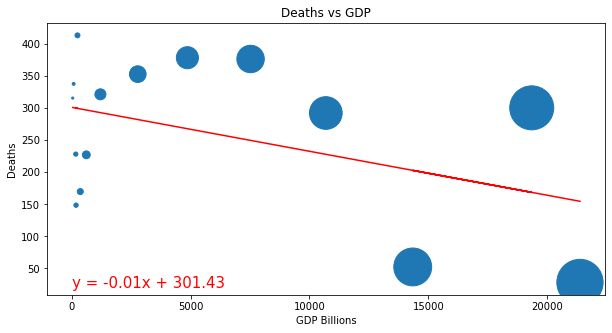

In [30]:
#  Is there any relationship between 2019 GDP with the infection rate/deaths?
x_axis = Final_GDP['2019 GDP in Billions']
y_axis = Final_GDP['Deaths per 1000 Cases']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_axis, y_axis, s = x_axis/10)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
# plt.xlim(0, 15000)
# plt.ylim(0, 80)
plt.title("Deaths vs GDP")
plt.xlabel("GDP Billions")
plt.ylabel("Deaths")
print(f"The r-squared is: {round(rvalue**2,5)}")
plt.savefig("COVID-19_DeathsvGDP_xlim15b.png")
plt.show()

The r-squared is: 0.18633


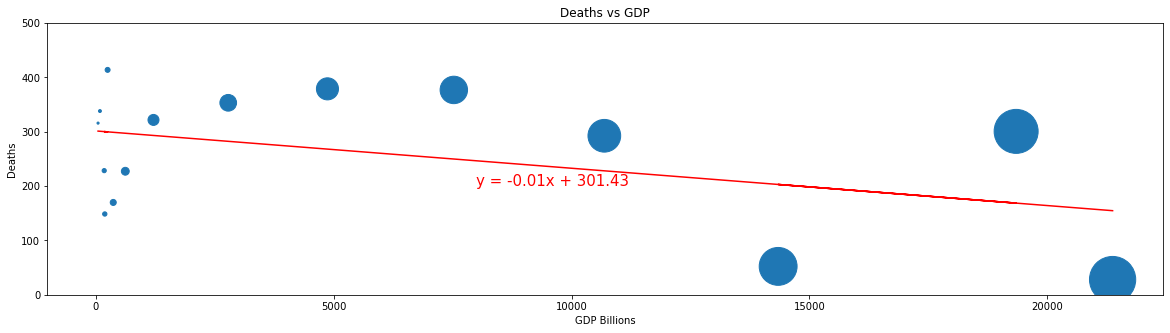

In [31]:
#  Is there any relationship between 2019 GDP with the infection rate/deaths?
x_axis = Final_GDP['2019 GDP in Billions']
y_axis = Final_GDP['Deaths per 1000 Cases']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(20, 5))
plt.scatter(x_axis, y_axis, s = x_axis/10)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(8000,200),fontsize=15,color="red")

# plt.xlim(0, 13000)
plt.ylim(0, 500)
plt.title("Deaths vs GDP")
plt.xlabel("GDP Billions")
plt.ylabel("Deaths")
print(f"The r-squared is: {round(rvalue**2,5)}")
plt.savefig("COVID-19_DeathsvGDP_nolim.png")
plt.show()

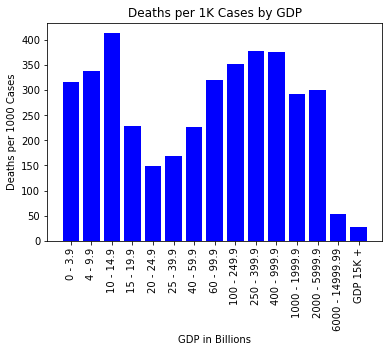

In [32]:
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, cities)
GDP_x = x_axis.reset_index()
GDP_x_axis = GDP_x['2019 GDP']
x_axis_GDP = list(GDP_x_axis)
deaths_ks = list(Final_GDP['Deaths per 1000 Cases'])
xd_axis = np.arange(len(deaths_ks))
plt.bar(xd_axis, deaths_ks, color="b", align="center")
xtick_marks = [value for value in xd_axis]
plt.xticks(xtick_marks, x_axis_GDP, rotation=90)
plt.title("Deaths per 1K Cases by GDP")
plt.xlabel("GDP in Billions")
plt.ylabel("Deaths per 1000 Cases")
plt.savefig("COVID-19_DeathsvGDP_bar.png")
plt.show()

The r-squared is: 0.02979


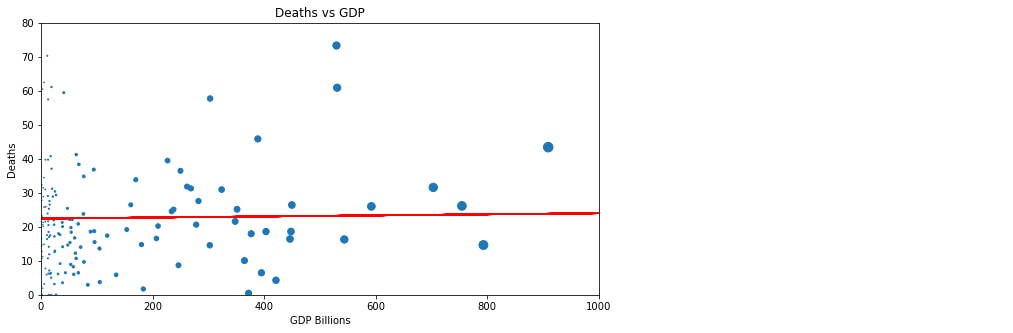

In [33]:
#  Is there any relationship between 2019 GDP with the infection rate/deaths?
x_axis = Final_data_two['2019 GDP in Billions']
y_axis = Final_data_two['Deaths per 1000 Cases']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_axis, y_axis, s = x_axis/10)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(1500,5),fontsize=15,color="red")
plt.xlim(0, 1000)
plt.ylim(0, 80)
plt.title("Deaths vs GDP")
plt.xlabel("GDP Billions")
plt.ylabel("Deaths")
print(f"The r-squared is: {round(rvalue**2,5)}")
plt.savefig("COVID-19_DeathsvGDP_scat_nogroup_lim1b.png")
plt.show()

The r-squared is: 0.02979


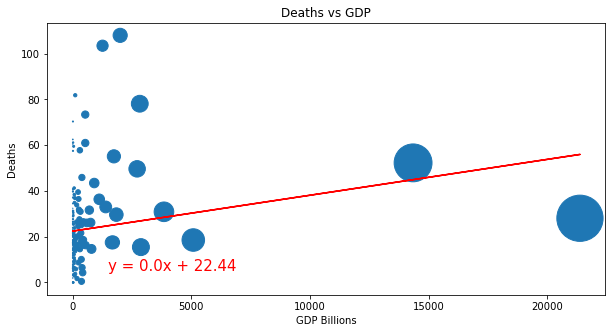

In [22]:
#  Is there any relationship between 2019 GDP with the infection rate/deaths?
x_axis = Final_data_two['2019 GDP in Billions']
y_axis = Final_data_two['Deaths per 1000 Cases']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_axis, y_axis, s = x_axis/10)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(1500,5),fontsize=15,color="red")
# plt.xlim(0, 1000)
# plt.ylim(0, 80)
plt.title("Deaths vs GDP")
plt.xlabel("GDP Billions")
plt.ylabel("Deaths")
print(f"The r-squared is: {round(rvalue**2,5)}")
plt.show()